# What's Convolution

In [1]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

In convolution, the parameter w is called a kernel. You can perform convolution on images where you let the variable image denote the variable X and w denote the parameter.

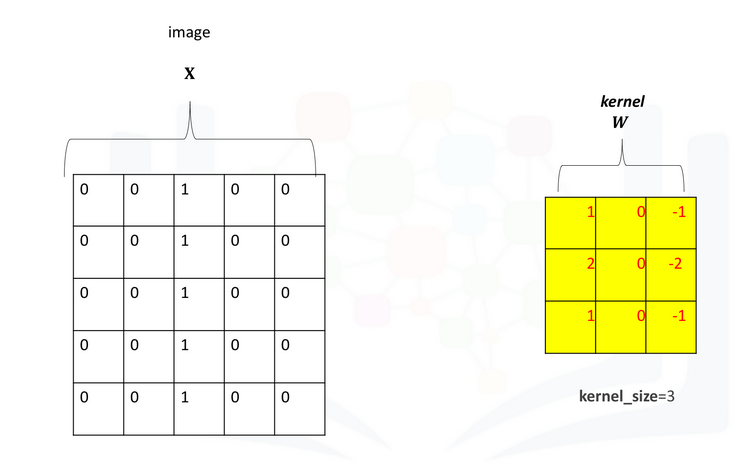

In [2]:
from IPython.display import Image
Image(filename="C:/Users/SND13188/Desktop/IMAGES_COURSE/Figure20.png",width=600,height=600)

Create a two-dimensional convolution object by using the constructor Conv2d, the parameter in_channels and out_channels will be used for this section, and the parameter kernel_size will be three.

In [4]:
conv = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
conv

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))

Because the parameters in nn.Conv2d are randomly initialized and learned through training, give them some values.

In [5]:
conv.state_dict()['weight'][0][0]=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
conv.state_dict()['bias'][0]=0.0
conv.state_dict()

OrderedDict([('weight', tensor([[[[ 1.,  0., -1.],
                        [ 2.,  0., -2.],
                        [ 1.,  0., -1.]]]])), ('bias', tensor([0.]))])

Create a dummy tensor to represent an image. The shape of the image is (1,1,5,5) where:

(number of inputs, number of channels, number of rows, number of columns )

Set the third column to 1:

In [6]:
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

Call the object conv on the tensor image as an input to perform the convolution and assign the result to the tensor z. 

In [8]:
z=conv(image)
z

tensor([[[[-4.,  0.,  4.],
          [-4.,  0.,  4.],
          [-4.,  0.,  4.]]]], grad_fn=<ThnnConv2DBackward>)

### Determining the Size of the Output

The size of the output is an important parameter. In this lab, you will assume square images. For rectangular images, the same formula can be used in for each dimension independently.

Let M be the size of the input and K be the size of the kernel. The size of the output is given by the following formula:

$$M_{new}=M-K+1$$

Create a kernel of size 2:


In [9]:
K=2
conv1 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=K)
conv1.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv1.state_dict()['bias'][0]=0.0
conv1.state_dict()
conv1

Conv2d(1, 1, kernel_size=(2, 2), stride=(1, 1))

Create an image of size 2:

In [10]:
M=4
image1=torch.ones(1,1,M,M)

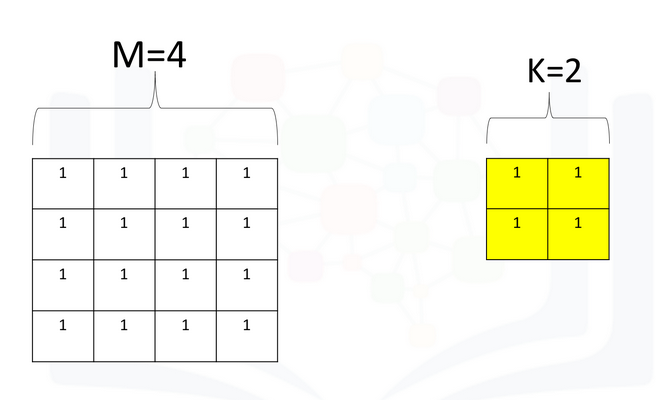

In [11]:
Image(filename="C:/Users/SND13188/Desktop/IMAGES_COURSE/Figure21.png",width=600,height=600)

The following equation provides the output:

$$M_{new}=M-K+1$$ $$M_{new}=4-2+1$$ $$M_{new}=3$$


Perform the convolution and verify the size is correct:

In [12]:
z1=conv1(image1)
print("z1:",z1)
print("shape:",z1.shape[2:4])

z1: tensor([[[[4., 4., 4.],
          [4., 4., 4.],
          [4., 4., 4.]]]], grad_fn=<ThnnConv2DBackward>)
shape: torch.Size([3, 3])


### Stride parameter

The parameter stride changes the number of shifts the kernel moves per iteration. As a result, the output size also changes and is given by the following formula:

$$M_{new}=\dfrac{M-K}{stride}+1$$

Create a convolution object with a stride of 2:


In [13]:
conv3 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=2)

conv3.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv3.state_dict()['bias'][0]=0.0
conv3.state_dict()

OrderedDict([('weight', tensor([[[[1., 1.],
                        [1., 1.]]]])), ('bias', tensor([0.]))])

For an image with a size of 4, calculate the output size:

$$M_{new}=\dfrac{M-K}{stride}+1$$ $$M_{new}=\dfrac{4-2}{2}+1$$ $$M_{new}=2$$


Perform the convolution and verify the size is correct: 

In [14]:
z3=conv3(image1)

print("z3:",z3)
print("shape:",z3.shape[2:4])

z3: tensor([[[[4., 4.],
          [4., 4.]]]], grad_fn=<ThnnConv2DBackward>)
shape: torch.Size([2, 2])


### Zero Padding

As you apply successive convolutions, the image will shrink. You can apply zero padding to keep the image at a reasonable size, which also holds information at the borders.

In addition, you might not get integer values for the size of the kernel. Consider the following image:


In [15]:
image1

tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])

Try performing convolutions with the kernel_size=2 and a stride=3. Use these values:

$$M_{new}=\dfrac{M-K}{stride}+1$$ $$M_{new}=\dfrac{4-2}{3}+1$$ $$M_{new}=1.666$$


In [16]:
conv4 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=3)
conv4.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv4.state_dict()['bias'][0]=0.0
conv4.state_dict()
z4=conv4(image1)
print("z4:",z4)
print("z4:",z4.shape[2:4])

z4: tensor([[[[4.]]]], grad_fn=<ThnnConv2DBackward>)
z4: torch.Size([1, 1])


You can add rows and columns of zeros around the image. This is called padding. In the constructor Conv2d, you specify the number of rows or columns of zeros that you want to add with the parameter padding.

For a square image, you merely pad an extra column of zeros to the first column and the last column. Repeat the process for the rows. As a result, for a square image, the width and height is the original size plus 2 x the number of padding elements specified. You can then determine the size of the output after subsequent operations accordingly as shown in the following equation where you determine the size of an image after padding and then applying a convolutions kernel of size K.

$$M'=M+2 \times padding$$ $$M_{new}=M'-K+1$$

Consider the following example:


In [17]:
conv5 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=3,padding=1)

conv5.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv5.state_dict()['bias'][0]=0.0
conv5.state_dict()
z5=conv5(image1)
print("z5:",z5)
print("z5:",z4.shape[2:4])

z5: tensor([[[[1., 2.],
          [2., 4.]]]], grad_fn=<ThnnConv2DBackward>)
z5: torch.Size([1, 1])


### Practice

A kernel of zeros with a kernel size=3 is applied to the following image: 

In [18]:
Image=torch.randn((1,1,4,4))
Image

tensor([[[[ 1.4052,  0.6032,  0.3787,  0.3430],
          [-0.5233,  1.5610,  1.6251,  1.6957],
          [-0.5128,  0.1673,  0.4231,  0.0723],
          [-0.1506, -1.8866, -1.0022, -0.7248]]]])

Question: Without using the function, determine what the outputs values are as each element:

As each element of the kernel is zero, and for every  output, the image is multiplied  by the  kernel, the result is always zero 

Question: Use the following convolution object to perform convolution on the tensor Image:

In [19]:
conv = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
conv.state_dict()['weight'][0][0]=torch.tensor([[0,0,0],[0,0,0],[0,0.0,0]])
conv.state_dict()['bias'][0]=0.0

In [20]:
conv(Image)

tensor([[[[0., 0.],
          [0., 0.]]]], grad_fn=<ThnnConv2DBackward>)

Question: You have an image of size 4. The parameters are as follows kernel_size=2,stride=2. What is the size of the output?

(M-K)/stride +1
(4-2)/2 +1
2